# NeurIPS data modelling

**Note:** This notebook is based over my Kaggle version and works on the respective Kaggle dataset [All NeurIPS (NIPS) Papers](https://www.kaggle.com/rowhitswami/nips-papers-1987-2019-updated). This one works slightly different than the original uploaded [here](https://www.kaggle.com/sboomi/observation-of-neurips-data).

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from pathlib import Path
root_dir = Path().resolve().parent
for filename in (root_dir / 'data' / 'raw').iterdir():
    print(filename)

D:\shadi\PythonProjects\MLScienceTrend-Analysis\data\raw\ml4physics.csv
D:\shadi\PythonProjects\MLScienceTrend-Analysis\data\raw\neurips.csv
D:\shadi\PythonProjects\MLScienceTrend-Analysis\data\raw\neurips_metadata


In [39]:
import matplotlib.pyplot as ply
%matplotlib inline

# Metadata analyzing

The JSON metadata is located in `data/raw/neurips_metadata`. Let's see the very first files.

In [17]:
metadata_dir = root_dir / 'data' / 'raw' / 'neurips_metadata'

for i, filename in enumerate(metadata_dir.iterdir()):
    print(filename.name)
    if i == 10:
        break

1987_02e74f10e0327ad868d138f2b4fdd6f0.json
1987_03afdbd66e7929b125f8597834fa83a4.json
1987_072b030ba126b2f4b2374f342be9ed44.json
1987_093f65e080a295f8076b1c5722a46aa2.json
1987_14bfa6bb14875e45bba028a21ed38046.json
1987_1679091c5a880faf6fb5e6087eb1b2dc.json
1987_182be0c5cdcd5072bb1864cdee4d3d6e.json
1987_19ca14e7ea6328a42e0eb13d585e4c22.json
1987_1c383cd30b7c298ab50293adfecb7b18.json
1987_1f0e3dad99908345f7439f8ffabdffc4.json
1987_1ff1de774005f8da13f42943881c655f.json


In [24]:
import json
from typing import Dict


def load_metadata_file(fp: Path) -> Dict:
    with open(fp, 'rb') as f:
        md = json.load(f)
    return md

md_file = load_metadata_file(metadata_dir / '1987_02e74f10e0327ad868d138f2b4fdd6f0.json')
md_file

{'title': 'Bit-Serial Neural Networks',
 'book': 'Neural Information Processing Systems',
 'page_first': 573,
 'page_last': 583,
 'abstract': None,
 'full_text': '573 \n\nBIT - SERIAL NEURAL  NETWORKS \n\nAlan F.  Murray,  Anthony V . W.  Smith  and Zoe F.  Butler. \n\nDepartment of Electrical Engineering,  University of Edinburgh, \n\nThe King\'s Buildings, Mayfield Road,  Edinburgh, \n\nScotland,  EH93JL. \n\nABSTRACT \n\nA  bit  - serial  VLSI  neural  network  is  described  from  an  initial  architecture  for  a \nsynapse array through to silicon layout and board design.  The issues surrounding bit \n- serial  computation,  and  analog/digital  arithmetic  are  discussed  and  the  parallel \ndevelopment  of  a  hybrid  analog/digital  neural  network  is  outlined.  Learning  and \nrecall  capabilities  are  reported  for  the  bit  - serial  network  along  with  a  projected \nspecification  for  a  64  - neuron,  bit  - serial  board  operating  at 20 MHz.  This tech(cid:173)

Let's check the contents of the metadata:

In [27]:
md_file.keys()

dict_keys(['title', 'book', 'page_first', 'page_last', 'abstract', 'full_text', 'award', 'sourceid', 'authors'])

So far it looks like we have data over the text and the authors. We could analyze these in detail and recompile the same kind of dataframe found on Kaggle.

However, I've added the entries for 2019 and 2020 and so far I've encountered some issues:

In [37]:
# Finding papers with failed download
# I've marked these ones with an 'error' key
from collections import defaultdict
from tqdm.notebook import tqdm

error_data = defaultdict(list)

for filename in tqdm(metadata_dir.iterdir(), desc="Checking DL errors", total=len(list(metadata_dir.iterdir()))):
    sample_md = load_metadata_file(metadata_dir / filename.name)
    if "error" in sample_md.keys():
        for k,v in sample_md.items():
            error_data[k].append(v)
        
error_file = pd.DataFrame(error_data)
error_file.head()

Checking DL errors:   0%|          | 0/10990 [00:00<?, ?it/s]

,error,url,contents,hash,year,status
0,Expecting value: line 1 column 1 (char 0),https://papers.nips.cc/paper/2020/file/0004d0b...,Resource Not Found,0004d0b59e19461ff126e3a08a814c33,2020,Download failed
1,Expecting value: line 1 column 1 (char 0),https://papers.nips.cc/paper/2020/file/00482b9...,Resource Not Found,00482b9bed15a272730fcb590ffebddd,2020,Download failed
2,Expecting value: line 1 column 1 (char 0),https://papers.nips.cc/paper/2020/file/0060ef4...,Resource Not Found,0060ef47b12160b9198302ebdb144dcf,2020,Download failed
3,Expecting value: line 1 column 1 (char 0),https://papers.nips.cc/paper/2020/file/007ff38...,Resource Not Found,007ff380ee5ac49ffc34442f5c2a2b86,2020,Download failed
4,Expecting value: line 1 column 1 (char 0),https://papers.nips.cc/paper/2020/file/0084ae4...,Resource Not Found,0084ae4bc24c0795d1e6a4f58444d39b,2020,Download failed


In [56]:
# Check the year proportion
print(f"N° of missing entries: {error_file.shape[0]}")
print(f"Entries missing for years: {error_file.year.unique().item()}")
print(f"Displayed content: {error_file.contents.unique().item()}")
print(f"Type of error: `{error_file.error.unique().item()}`")

N° of missing entries: 1310
Entries missing for years: 2020
Displayed content: Resource Not Found
Type of error: `Expecting value: line 1 column 1 (char 0)`


The metadata doesn't exist!

It happened because the papers from 2020 are still in review or the website wasn't updated since the entries for 2020 were added. What we have here is a review tab exposing the reviews:

In [62]:
from IPython.display import HTML
import requests

review_url = "https://papers.nips.cc/paper/2020/file/0004d0b59e19461ff126e3a08a814c33-Review.html"

HTML(review_url)

## DataFrame condensing

Better try and condense everything either in a dataframe or in a SQL base. Considering the data amount, it's probably easier to create a SQL DB. However for the sake of this notebooke I'm going to create a DF similar to the one dataset on Kaggle.

In [65]:
# Let's get the keys from the correct dataframes
# Keep this in mind if you want to create ORM classes for your SQL input
keys = set()

for filename in tqdm(metadata_dir.iterdir(), desc="Checking DL errors", total=len(list(metadata_dir.iterdir()))):
    sample_md = load_metadata_file(metadata_dir / filename.name)
    if "error" not in sample_md.keys():
        keys.update(list(sample_md.keys()))

print(list(keys))

Checking DL errors:   0%|          | 0/10990 [00:00<?, ?it/s]

['abstract', 'full_text', 'book', 'award', 'authors', 'page_last', 'sourceid', 'page_first', 'title']


# File cleaning

First, let's open the list of papers and authors.

In [3]:
papers = pd.read_csv("/kaggle/input/nips-papers-1987-2019-updated/papers.csv")
papers.head()

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...


In [4]:
authors = pd.read_csv("/kaggle/input/nips-papers-1987-2019-updated/authors.csv")
authors.head()

,source_id,first_name,last_name,institution
0,27,Alan,Murray,NaN
1,27,Anthony,Smith,NaN
2,27,Zoe,Butler,NaN
3,63,Yaser,Abu-Mostafa,NaN
4,60,Michael,Fleisher,NaN


So far, some values are missing from both CSVs. The author dataset misses a couple of institutions and the abstracts are not all presents in the paper dataset.

In [5]:
# Check the NaNs
def show_na_proportion(df, name="df"):
    print(f"Percentage of NaNs for {name}:")
    print((df.isna().sum() / df.shape[0]).mul(100).round(2))
    return df.columns[df.isna().sum() > 0]

na_col_papers = show_na_proportion(papers, name="papers")
na_col_authors = show_na_proportion(authors, name="authors")

Percentage of NaNs for papers:
source_id     0.00
year          0.00
title         0.00
abstract     34.29
full_text     0.03
dtype: float64
Percentage of NaNs for authors:
source_id       0.00
first_name      0.00
last_name       0.01
institution    42.78
dtype: float64


The full text is present for almost every paper. However, 35% of abstracts are missing. This shouldn't impact the analysis as these are present inside the full text. We can thus omit this column.

However, more than 40% of institutions are missing. We can assume the institution either isn't reported, or the paper isn't affiliated to any institution at all.

In [6]:
author_institution_unique_vals = authors.institution.unique()
print(f"Number of unique institution values: {author_institution_unique_vals.size}")
print("for values:", author_institution_unique_vals)

Number of unique institution values: 2672
for values: [nan 'Bell Labs' 'Lucent Technologies' ... 'Peng Cheng Laboratory'
 'Ecole normale supérieure' 'Toyota Central R&D Labs., Inc.']


Let's deal with those missing values...

In [7]:
from sklearn.impute import SimpleImputer

no_na_papers = SimpleImputer(strategy="constant", fill_value="NO DATA").fit_transform(papers.drop('abstract', axis=1))
no_na_authors = SimpleImputer(strategy="constant", fill_value="NO DATA").fit_transform(authors)

no_na_papers = pd.DataFrame(data=no_na_papers, columns=[col for col in papers.columns if col != 'abstract'])
no_na_authors = pd.DataFrame(data=no_na_authors, columns=authors.columns)

show_na_proportion(no_na_papers, name="papers (no NaN)")
show_na_proportion(no_na_authors, name="authors (no NaN)")

Percentage of NaNs for papers (no NaN):
source_id    0.0
year         0.0
title        0.0
full_text    0.0
dtype: float64
Percentage of NaNs for authors (no NaN):
source_id      0.0
first_name     0.0
last_name      0.0
institution    0.0
dtype: float64


Index([], dtype='object')

# Author analysis

One might observe the repartition between
- The papers and the institution
- The authors and the institution
- The number of papers per author

This analysis might help us identify the big shots of Deep Learning research.

To avoid any confusions between the names, we'll create a column titled `full_name`, where the first and last names are combined.

In [8]:
no_na_authors["full_name"] = no_na_authors.apply(lambda row: row.first_name + " " + row.last_name, axis=1) 
no_na_authors.head()

,source_id,first_name,last_name,institution,full_name
0,27,Alan,Murray,NO DATA,Alan Murray
1,27,Anthony,Smith,NO DATA,Anthony Smith
2,27,Zoe,Butler,NO DATA,Zoe Butler
3,63,Yaser,Abu-Mostafa,NO DATA,Yaser Abu-Mostafa
4,60,Michael,Fleisher,NO DATA,Michael Fleisher


Now we can see the top 10 of the authors who contributed the most in NeurIPS articles:

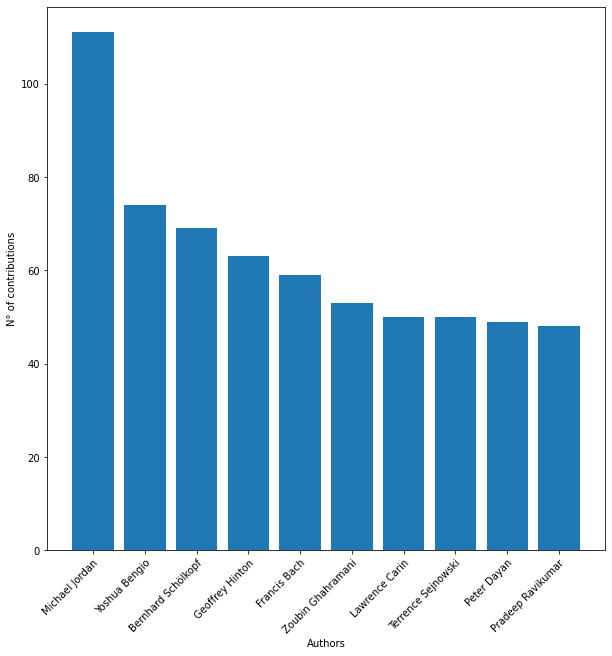

In [9]:
import matplotlib.pyplot as plt

top_10_contributors = no_na_authors.full_name.value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(top_10_contributors.index, top_10_contributors.values)
ax.set_xlabel("Authors")
ax.set_ylabel("N° of contributions")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

As we can see, Michael Jordan is by far the author who contributed the most. A quick research in the data shows he works for UC Berkeley among the publications he figures in.

The same goes for the rest of the top 10: they all work at prestigious schools and corporations like Cambridge, Montreal or Google.

In [10]:
top_10_auth_inst = set([inst for author in top_10_contributors.index for inst in no_na_authors[no_na_authors.full_name == author].institution.unique().tolist()])
top_10_auth_inst = list(top_10_auth_inst)

print("List of institutions from the top 10:", top_10_auth_inst)

List of institutions from the top 10: ['Inria', 'UC Berkeley', 'Google & University of Toronto', 'Max Planck Institute for Biological Cybernetics', 'Mila', 'Carnegie Mellon University', 'University of Cambridge', 'INRIA - Ecole Normale Superieure', 'INRIA - ENS', 'MPI for Intelligent Systems Tübingen, Germany', 'University of Texas at Austin', 'MPI for Intelligent Systems', 'INRIA & ENS', 'Google', 'Uber and University of Cambridge', 'University of Montreal', 'NO DATA', 'UT Austin', 'Gatsby Unit, UCL', 'Salk Institute', 'U. Montreal', 'Mila - University of Montreal', 'Université de Montréal', 'Duke University', 'MPI Tübingen']


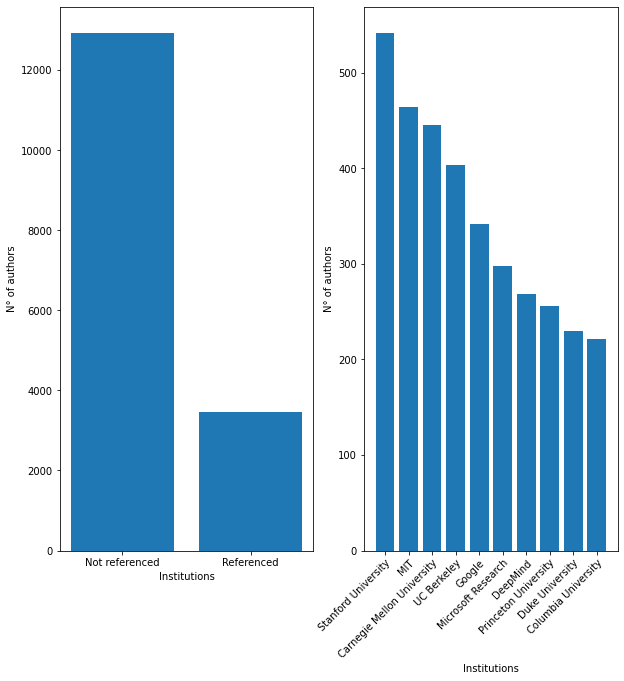

In [11]:
top_10_institutions = no_na_authors.institution.value_counts().head(11)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,10))

ax1.bar(["Not referenced", "Referenced"],[top_10_institutions.values[0], top_10_institutions.values[1:].sum()])
ax1.set_xlabel("Institutions")
ax1.set_ylabel("N° of authors")

ax2.bar(top_10_institutions.index[1:], top_10_institutions.values[1:])
ax2.set_xlabel("Institutions")
ax2.set_ylabel("N° of authors")
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

The top 10 of institutions seems to corroborate that fact.

# NeurIPS Papers

Each paper so far has a title, a year of publication and a text content. The first thing we can notice so far is how fast interest for Deep Learning research evolves between yearly congresses:

[]

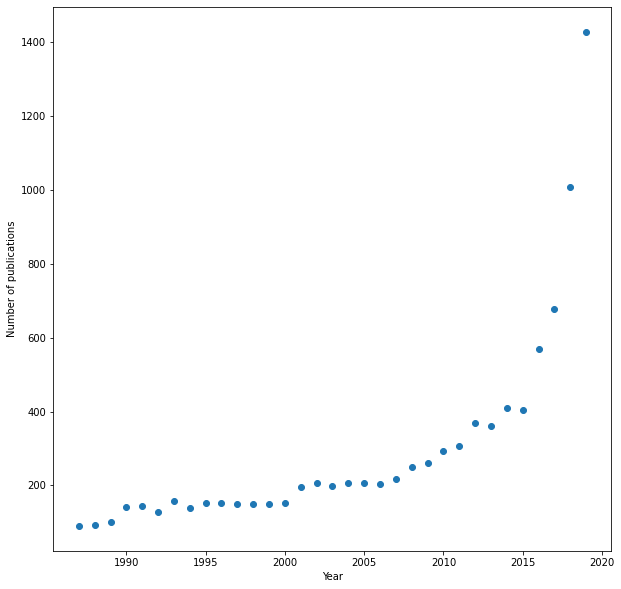

In [12]:
papers_per_year = no_na_papers.year.value_counts()

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(papers_per_year.index, papers_per_year.values)
ax.set_xlabel("Year")
ax.set_ylabel("Number of publications")
plt.plot()

The graph reveals the interest for deep learning grows slightly at first, then rises fastly in the second part of the 10s, most likely because ML and data science generated a hype wave thanks to the biggest accomplishments from neural networks.

Out of interest, we can pick the most recent article Michael Jordan wrote or contributed to:

In [13]:
first_article = no_na_authors[no_na_authors.full_name == "Michael Jordan"].join(no_na_papers.set_index('source_id'), 
                                                                                how='inner', on='source_id').sort_values('year', ascending=False).head(1)
first_article

,source_id,first_name,last_name,institution,full_name,year,title,full_text
30172,1135,Michael,Jordan,UC Berkeley,Michael Jordan,2019,Transferable Normalization: Towards Improving ...,Transferable Normalization: Towards Improving\...


There's several articles from 2019. Let's pick this one and see how the title and full text are. The text is quite long so let's limit it to 5000 characters.

In [14]:
title = first_article.title.values[0]
text = first_article.full_text.values[0]

print(title)
print(text[:2500], "...", text[-2500:],sep='\n')

Transferable Normalization: Towards Improving Transferability of Deep Neural Networks
Transferable Normalization: Towards Improving

Transferability of Deep Neural Networks

Ximei Wang, Ying Jin, Mingsheng Long ((cid:66))∗, Jianmin Wang, and Michael I. Jordan(cid:93)

School of Software, BNRist, Tsinghua University, China
Research Center for Big Data, Tsinghua University, China
National Engineering Laboratory for Big Data Software

(cid:93)University of California, Berkeley, Berkeley, USA

{wxm17,jiny18}@mails.tsinghua.edu.cn

{mingsheng,jimwang}@tsinghua.edu.cn

jordan@cs.berkeley.edu

Abstract

Deep neural networks (DNNs) excel at learning representations when trained on
large-scale datasets. Pre-trained DNNs also show strong transferability when ﬁne-
tuned to other labeled datasets. However, such transferability becomes weak when
the target dataset is fully unlabeled as in Unsupervised Domain Adaptation (UDA).
We envision that the loss of transferability mainly stems from the intrin

According to the description, the dataset was scraped from the HTML version, thus explaining why the text has more spaces than needed. On the other hand, it contains a plethora of informations:

* The title
* Details about the authors
* The abstract
* The different sections of an article, from the introduction to the conclusion
* A list of references

In a scientific article, the title and the abstract are the most important parts of the discovery of a topic. An abstract must contain a brief summary of the article describing the problematic, the used method, the dataset, and a summary of the final results. Meanwhile, a title is a way to promote the article using **keywords**.

In [15]:
kw_sample = [word.lower().replace(":", "") for word in title.split() if word.lower() != "of"]
kw_sample

['transferable',
 'normalization',
 'towards',
 'improving',
 'transferability',
 'deep',
 'neural',
 'networks']

# Sorting keywords

Using just a word counter, we can encapsulate in a dataframe the number of relevant words per title. First we're going to determine the word quantity among these documents.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
title_vectorized = vectorizer.fit_transform(no_na_papers.title)

feature_count = pd.DataFrame({
    "feat_name": vectorizer.get_feature_names(), 
    "feat_count": title_vectorized.toarray().sum(axis=0).tolist()
})

feature_count.sort_values(by='feat_count', ascending=False).head(20)

,feat_name,feat_count
2290,for,2840
4088,of,2311
3233,learning,2208
234,and,1706
6575,with,1423
2810,in,1379
6033,the,1203
3921,neural,913
3920,networks,863
6103,to,760


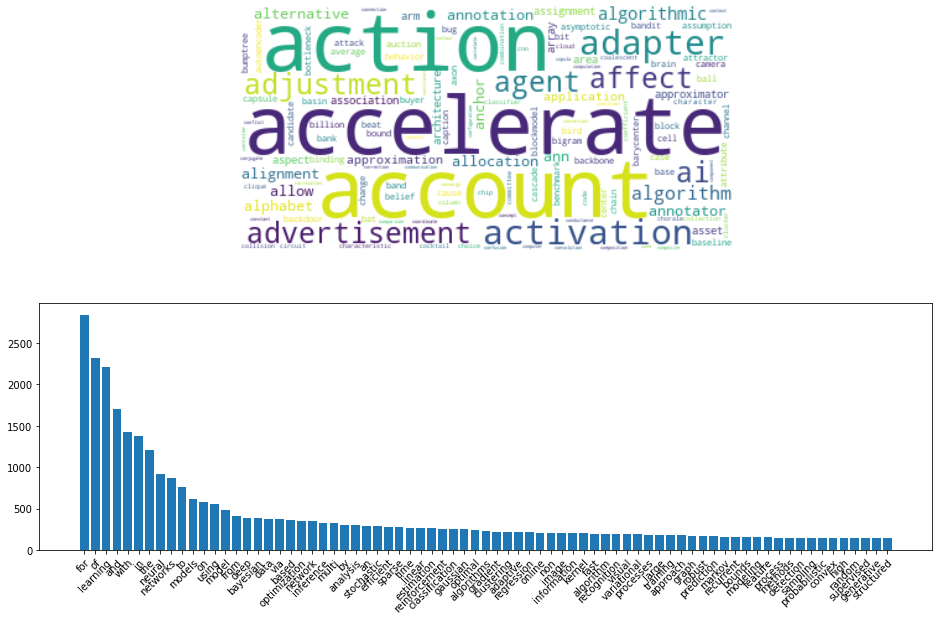

In [17]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Only limit the plot to the nth entry
n_entries = 75

vals_to_display = feature_count.sort_values(by='feat_count', ascending=False).head(n_entries)

ax2.bar(x=vals_to_display.feat_name.values, height=vals_to_display.feat_count.values)

# define a wordcloud
wc = WordCloud(background_color="white")
wc.generate(" ".join(vectorizer.get_feature_names()))

ax1.imshow(wc, interpolation="bilinear")
ax1.axis("off")

plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.show()

As we can see, the most common terms come from either stop words or particular terms from Deep Learning. In the top 10, we can see, aside from stop words, that words like "deep", "neural" and "networks" often come by in the words. One can deduce, according to the thematic, that these can form the following words :

* Neural Networks
* Deep Neural Networks
* Neural Networks model
* etc...

As such, it's more appropriate to use a 2 or 3-gram count vectorizer.

In [18]:
feature_count = {
    "feat_name": [],
    "feat_count": [],
    "feat_n_gram": []
}

title_sw = ["for", "of", "and", "with", "in", "the", "to", "on", "from", "via", "by", "an"]

for i_gram in range(1,4):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(i_gram, i_gram), stop_words=title_sw)
    title_vectorized = vectorizer.fit_transform(no_na_papers.title)

    feature_count["feat_name"].extend(vectorizer.get_feature_names())
    feature_count["feat_count"].extend(title_vectorized.toarray().sum(axis=0).tolist())
    feature_count["feat_n_gram"].extend([i_gram] * len(vectorizer.get_feature_names()))
    
feature_count = pd.DataFrame(feature_count)
feature_count.sort_values(by='feat_count', ascending=False).head(20)

,feat_name,feat_count,feat_n_gram
3227,learning,2208,1
3915,neural,913,1
3914,networks,863,1
3713,models,612,1
6361,using,549,1
3710,model,481,1
28718,neural networks,415,2
1467,deep,389,1
519,bayesian,380,1
1411,data,377,1


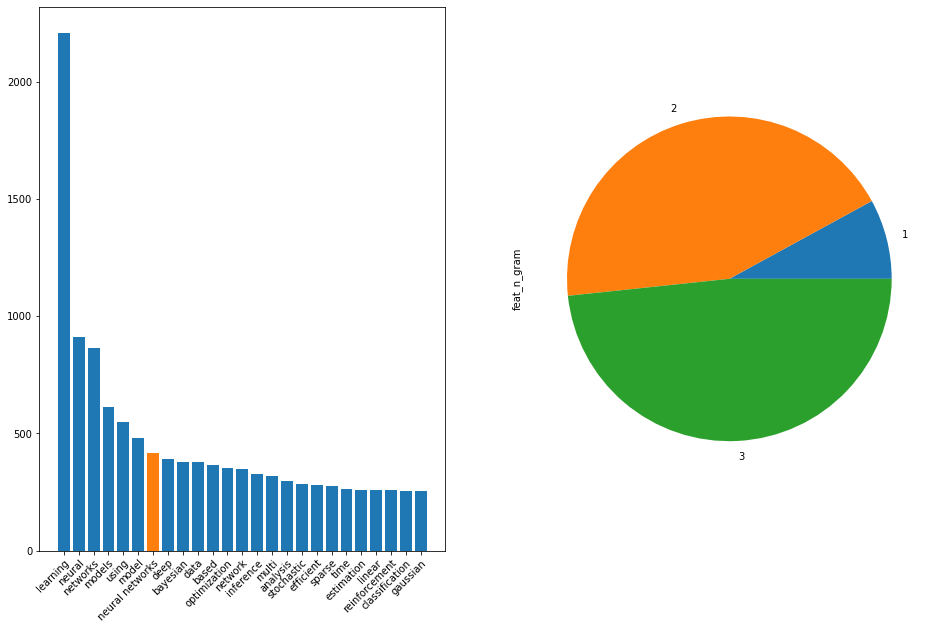

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
tab_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Only limit the plot to the nth entry
n_entries = 25

vals_to_display = feature_count.sort_values(by='feat_count', ascending=False).head(n_entries)

ax1.bar(x=vals_to_display.feat_name.values, height=vals_to_display.feat_count.values, 
        color=vals_to_display.feat_n_gram.apply(lambda i_gram: tab_colors[i_gram-1]).values)

feature_count.feat_n_gram.value_counts(ascending=True).plot.pie(ax=ax2)

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")


plt.show()

The code so far shows a higher proportion of 3 n-grams (more specific terms) and a more frequent proportion of single words terms. The trick with scientific articles is estimating the right number of n-gram words, as terms in research can get very specific, especially when it comes to presenting a variation of an already practiced method. Some titles can use acronyms but these are rare.

In [20]:
for i_gram in range(1,4):
    top_50 = feature_count[feature_count.feat_n_gram == i_gram].sort_values(by='feat_count', ascending=False).head(50)
    print(f"Top 20 of the most common {i_gram}-gram words:\n{', '.join(top_50.feat_name.tolist())}\n")

Top 20 of the most common 1-gram words:
learning, neural, networks, models, using, model, deep, bayesian, data, based, optimization, network, inference, multi, analysis, stochastic, efficient, sparse, time, estimation, linear, reinforcement, classification, gaussian, optimal, algorithms, gradient, adaptive, clustering, regression, online, non, image, kernel, information, fast, algorithm, recognition, visual, variational, processes, large, approach, training, graph, robust, prediction, markov, recurrent, modeling

Top 20 of the most common 2-gram words:
neural networks, reinforcement learning, neural network, gaussian process, large scale, high dimensional, gaussian processes, graphical models, semi supervised, gradient descent, monte carlo, supervised learning, deep learning, variational inference, deep neural, low rank, recurrent neural, active learning, support vector, online learning, stochastic gradient, time series, speech recognition, multi task, generative models, convolutional 

From the top 50 words, we can deduce that a 1-gram research regroups common scientific terms like "kernel", "variational" or "reinforcment", without specifying exactly the kind of topic we would find, while an increasing number of n-grams would narrow down the topic. 

We can see that selecting "deep reinforcment learning" would lead us to articles talking about Q-learning and it's variants, while "reinforcement" could not only mean "reinforcment learningé, but imply that a DL model can be reinforced.

We can always check the diversity of 3-gram words per year, which would show a constant evolution of the Deep Learning field:

In [21]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(3, 3), stop_words=title_sw)

X = vectorizer.fit_transform(no_na_papers.title)

diversity_papers = no_na_papers.loc[:, ("title", "year")]

diversity_papers["n_themes"] = diversity_papers.index.values
diversity_papers["n_themes"] = diversity_papers["n_themes"].apply(lambda row: np.nonzero(X[row,:])[1].tolist())

diversity_papers.head()


,title,year,n_themes
0,Bit-Serial Neural Networks,1987,"[4194, 33248]"
1,Connectivity Versus Entropy,1987,[6672]
2,The Hopfield Model with Multi-Level Neurons,1987,"[15407, 22497, 23424]"
3,How Neural Nets Work,1987,"[15458, 24736]"
4,Spatial Organization of Neural Networks: A Pro...,1987,"[34418, 26914, 24934, 24521, 28968]"


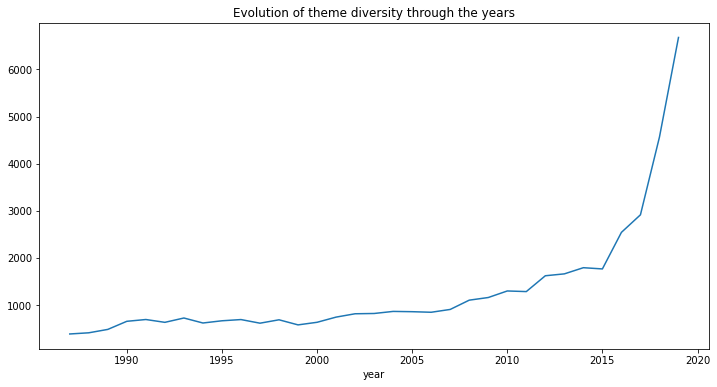

In [22]:
yr_div_evolution = diversity_papers.groupby('year').sum().n_themes.apply(lambda row: len(list(set(row))))
fig, ax = plt.subplots(figsize=(12, 6))

yr_div_evolution.plot(ax=ax)
ax.set_title("Evolution of theme diversity through the years")
plt.show()

As expected, as research in Deep Learning goes, the further the knowledge of the field gets refined. Notice the exponential growth starting from 2015 onwards, when AI is becoming a hype trend.

We can also observe the increase and decrease in themes according to the year, when desired words started to appear. Let's try with "graph neural networks":

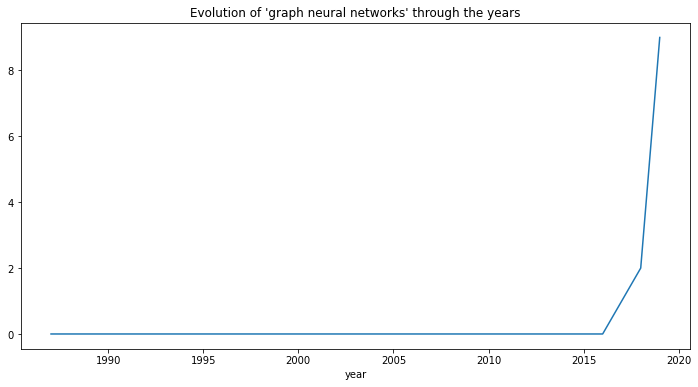

In [23]:
def trace_word_popularity(word):
    is_word_in_list = np.array([feat==word for feat in vectorizer.get_feature_names()])
    if not is_word_in_list.any():
        raise Exception("Couldn't find the word you were looking for.")
        
    if len(word.split()) != 3:
        raise Exception("Must be a 3 word long token separated by spaces.")
        
    word_idx = np.argwhere(is_word_in_list).item()
    count_df = (diversity_papers.groupby('year').sum().n_themes
                .apply(lambda row: np.array(row))
                .apply(lambda row: row[row == word_idx].size))
    fig, ax = plt.subplots(figsize=(12, 6))

    count_df.plot(ax=ax)
    ax.set_title(f"Evolution of '{word}' through the years")
    plt.show()
    


test_word = "graph neural networks"
trace_word_popularity(test_word)

Nothing before 2016. Which makes sense since GNNs are a recent deep learning neural network.

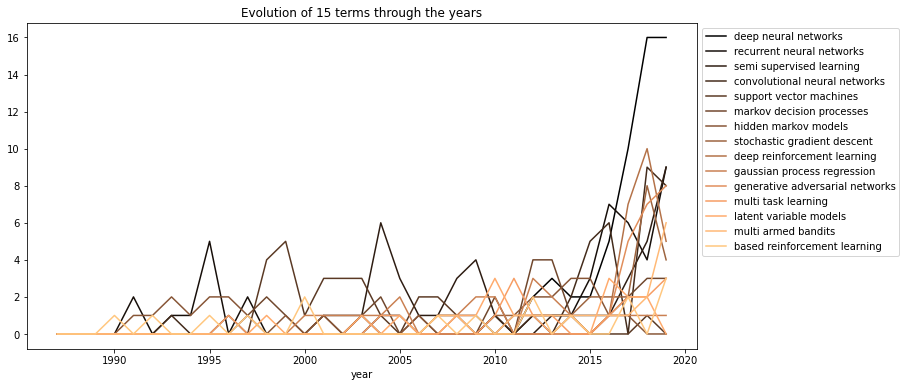

In [24]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

def make_segmented_cmap(cmap_name, n_segments):
    cmap = cm.get_cmap(cmap_name, n_segments)
    if isinstance(cmap, LinearSegmentedColormap):
        cmap = cmap(range(n_segments))
    else:
        cmap = cmap.colors
    return cmap

def words_trend_3_gram(words, cmap_name='autumn'):
    cmap = make_segmented_cmap(cmap_name, len(words))
    fig, ax = plt.subplots(figsize=(12, 6))
    for idx, word in enumerate(words):
        is_word_in_list = np.array([feat==word for feat in vectorizer.get_feature_names()])
        if not is_word_in_list.any():
            raise Exception("Couldn't find the word you were looking for.")

        if len(word.split()) != 3:
            raise Exception("Must be a 3 word long token separated by spaces.")

        word_idx = np.argwhere(is_word_in_list).item()
        count_df = (diversity_papers.groupby('year').sum().n_themes
                    .apply(lambda row: np.array(row))
                    .apply(lambda row: row[row == word_idx].size))
        
        count_df.plot(ax=ax, color=cmap[idx], label=word)
        
    ax.set_title(f"Evolution of {len(words)} terms through the years")
    ax.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

# testing on the previous top_50:
words_trend_3_gram(top_50.feat_name.tolist()[:15], cmap_name='copper')

From the top 15 it's hard to deduce and compare individually how each term fares compared to each other. There doesn't seem to be a decline in a thematic or another. However, the most popular term, "deep neural networks", is on the rise. Mostly because it's the main thematic of NeurIPS papers...

# Analyzing paper contents

Last but not least, we'll try and decipher the contents of the full papers within the CSV file. The first thing I'm interested in is seeing the character range between all these papers.

Mean number of characters: 32292.42
The number of characters goes from 1 to 1167593


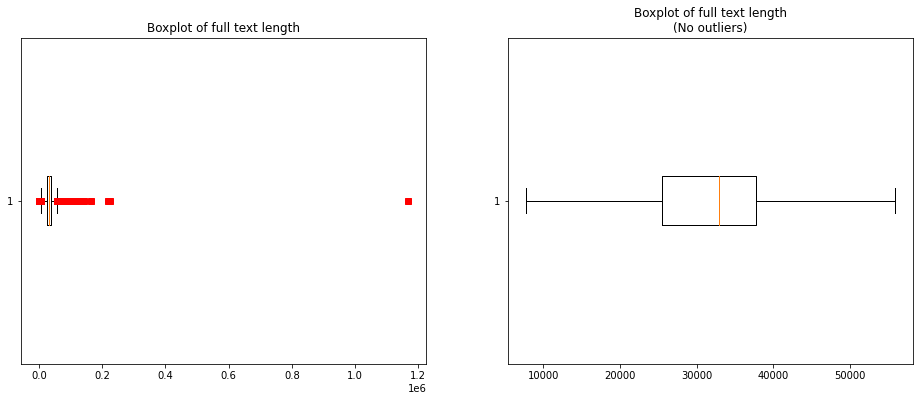

In [25]:
# Cleaning
paper_length = no_na_papers.full_text.apply(lambda text: len(text))

print(f"Mean number of characters: {paper_length.describe().loc['mean']:.2f}")
print(f"The number of characters goes from {paper_length.describe().loc['min']:.0f}",
      f"to {paper_length.describe().loc['max']:.0f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.boxplot(paper_length.values, 0, 'rs', 0)
ax1.set_title("Boxplot of full text length")

ax2.boxplot(paper_length.values, 0, '', 0)
ax2.set_title("Boxplot of full text length\n(No outliers)")

plt.show()

This is very strange indeed! The shortest text is 1 character long, while the longest ones exceed 100k characters. If you remove the outliers as indicated by the boxplot, the average article is around 25-35k characters, which is consistent with the average Arxiv article.

## Filter outliers

The shortest articles are less than 10k characters. Let's analyze the top 10 of the shortest texts:

In [26]:
for i, row in paper_length.sort_values(ascending=True).head(10).iteritems():
    print(f"Text n°{i}, {row} characters")
    print(no_na_papers.full_text.iloc[i])

Text n°6901, 1 characters


Text n°4686, 7 characters
NO DATA
Text n°6211, 7 characters
NO DATA
Text n°4481, 7 characters
NO DATA
Text n°6570, 9 characters










Text n°6106, 9 characters










Text n°7978, 10 characters











Text n°9470, 10 characters











Text n°8768, 11 characters












Text n°2041, 65 characters
*
1
*


.
2
[
.
.
.


S -

-1

[

1



] =


.
S -

-1

[

1



-


As we can see, the data is either missing or is outright saying gibberish. Probably as a result of the metadata missing or the request failing for a mysterious reason (eg. the hashes aren't registered). I won't display more for space reasons , but if you show a full text at random, you can see some of the shortest documents in the top 20 are indeed real documents that are just slightly shorter than the average article.

Another thing that I've noticed, especially if you open large articles, is the amount of whitespaces left by the text, which results in a disproportionnate number of characters. Try opening the largest article and see that it has a lot of whitespace in some of its parts. My guess is the metadata couldn't constrain $\LaTeX$ expressions and tables. Figures could also be the result. 

In some cases, it's most likely due to the paper's styling. Some papers put extra tabs and spaces to delimit author names and affiliations in example. Another explanation is extra space being left for the columns, although Arxiv papers hardly ever do this.

In [27]:
# Whitespace ratio
import re

def whitespace_ratio(text: str, verbose: bool = False) -> float:
    """
    Takes a text and estimates the number of whitespaces over the
    number of characters. Uses the common token `\s` for estimation.
    """
    len_text = len(text)
    count_whitespaces = 0
    
    for match in re.finditer(r'\s', text, re.MULTILINE):
        count_whitespaces += (match.end() - match.start())
        
    if verbose:
        print(f"Total whitespaces: {count_whitespaces} / {len_text} ({count_whitespaces/len_text:.2%})")
        
    return count_whitespaces / len_text

longest_paper = no_na_papers.full_text.iloc[paper_length.sort_values(ascending=True).tail(1).index.item()]

_ = whitespace_ratio(longest_paper, verbose=True)

Total whitespaces: 1149720 / 1167593 (98.47%)


As we can see, the largest paper so far is just blank space. Only 1.5% of the document is actually exploitable text, that is, if you don't count the equations.

~~*Note: the following cell might take a while to run due to the iterative process. Statistics made with `tqdm` estimate 1:40h of calculations. The operation is using multiprocessing calculations to get the job done. If you want to reproduce the same stepw ith your CPU, you can use `os.cpu_count()` on your machine and change `n_cores`.*~~

**ERRATUM:** The miscalculation might be due to an old variable being stuck. You can use apply but I'll let the multiprocess method just to show how you can clean up large walls of text in case you need more power.

In [28]:
from typing import Callable
from multiprocessing import Pool
from functools import partial

# Function to parallelize the series
# Many thanks to Rahul Agarwal for the tip
# https://towardsdatascience.com/make-your-own-super-pandas-using-multiproc-1c04f41944a1
def parallelize_series(s: pd.Series, func: Callable, n_cores: int = 4) -> pd.Series:
    """
    Uses Kaggle's CPU cores to divide the work and accelerate the process.
    """
    s_split = np.array_split(s, n_cores)
    pool = Pool(n_cores)
    s = pd.concat(pool.map(func, s_split))
    pool.close()
    pool.join()
    return s

# Using this step because `Pool.map` doesn't picklize lambdas
def transform_series(s: pd.Series, f: Callable) -> pd.Series:
    """
    Calls pandas Series' apply method.
    """
    return s.apply(f)

%time paper_ws_ratio = parallelize_series(no_na_papers.full_text, partial(transform_series, f=whitespace_ratio), n_cores = os.cpu_count())

# Then we sort the values to show the results
paper_ws_ratio.sort_values().tail(20)

CPU times: user 889 ms, sys: 791 ms, total: 1.68 s
Wall time: 13.5 s


2643    0.565062
2569    0.572283
2608    0.573452
2605    0.574657
2668    0.576233
2645    0.598599
2537    0.607872
2041    0.615385
2680    0.638081
2691    0.697925
2601    0.756678
2524    0.766375
2572    0.911327
2560    0.984692
9470    1.000000
8768    1.000000
6570    1.000000
7978    1.000000
6901    1.000000
6106    1.000000
Name: full_text, dtype: float64

Let's see the correlation between the number of whitespaces and the number of characters. I expect a positive correlation as the longest papers are full of white spaces.

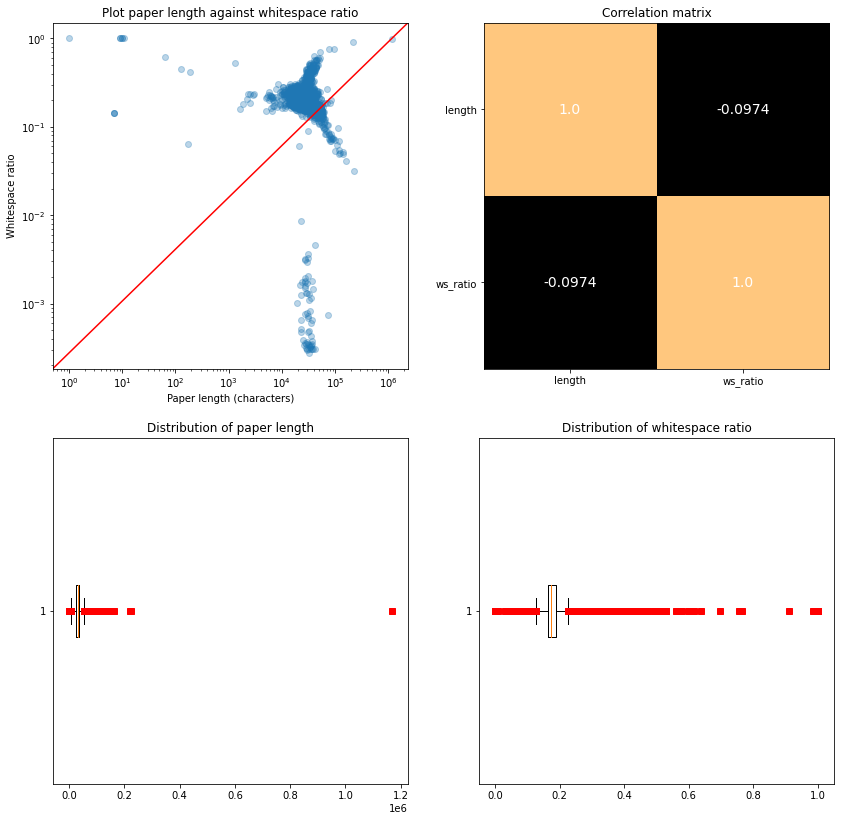

In [29]:
interm_result = pd.concat([paper_length.rename('length'), paper_ws_ratio.rename('ws_ratio')], axis=1).corr()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

ax1.scatter(paper_length.values, paper_ws_ratio.values, alpha=0.3)
ax1.plot([0, 1], [0, 1], transform=ax1.transAxes, color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title("Plot paper length against whitespace ratio")
ax1.set_xlabel("Paper length (characters)")
ax1.set_ylabel("Whitespace ratio")

ax2.imshow(interm_result, cmap='copper')
ax2.set_xticks(np.arange(interm_result.shape[1]))
ax2.set_yticks(np.arange(interm_result.shape[1]))
ax2.set_xticklabels(interm_result.columns.values)
ax2.set_yticklabels(interm_result.columns.values)
for i in range(interm_result.shape[1]):
    for j in range(interm_result.shape[1]):
        text = ax2.text(j, i, interm_result.iloc[i, j].round(4), fontsize=14,
                       ha="center", va="center", color="w")
ax2.set_title("Correlation matrix")

ax3.boxplot(paper_length.values, 0, 'rs', 0)
ax3.set_title("Distribution of paper length")

ax4.boxplot(paper_ws_ratio.values, 0, 'rs', 0)
ax4.set_title("Distribution of whitespace ratio")

plt.show()

The correlation coefficient doesn't show a linear tendency between the whitespace ratio and the paper length. Instead, it looks like the scatter plot reveals two clusters in the distribution where the link between paper length and whitespace ratio is above the norm. There's also a small cluster under the red line where the whitespace ratio is neglectible, indicating a compact paper. 

The boxplots indicate the whitespace ratio is around 18% and spreads between 15 and 20%, which coincides with the diameter of the blob we see in the top-left graph.

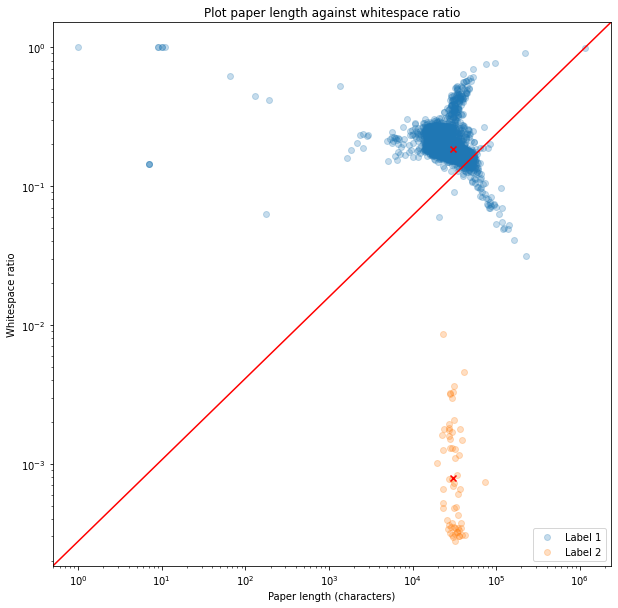

In [30]:
from sklearn.cluster import KMeans

paper_ws = pd.concat([paper_length.rename('length'), paper_ws_ratio.rename('ws_ratio')], axis=1)
kmeans = KMeans(n_clusters=2, random_state=1).fit(paper_ws.apply(np.log))

fig, ax = plt.subplots(figsize=(10, 10))
paper_ws['clusters'] = kmeans.labels_
kmeans_cmap  = ['tab:blue', 'tab:orange']

for c in range(2):
    ax.scatter(paper_ws[paper_ws.clusters == c].length, paper_ws[paper_ws.clusters == c].ws_ratio, 
               color=kmeans_cmap[c], alpha=0.25, label=f"Label {c+1}")

ax.scatter(np.exp(kmeans.cluster_centers_)[:,0], np.exp(kmeans.cluster_centers_)[:,1], marker='x', color='red')
    
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Plot paper length against whitespace ratio")
ax.set_xlabel("Paper length (characters)")
ax.set_ylabel("Whitespace ratio")

ax.legend()
plt.show()

In [31]:
compact_text = no_na_papers.iloc[paper_ws[paper_ws.clusters == 1].index].full_text.head(5)

for _, row in compact_text.iteritems():
    print(row[:1000], '\n')

LearningBoundsforDomainAdaptationJohnBlitzer,KobyCrammer,AlexKulesza,FernandoPereira,andJenniferWortmanDepartmentofComputerandInformationScienceUniversityofPennsylvania,Philadelphia,PA19146{blitzer,crammer,kulesza,pereira,wortmanj}@cis.upenn.eduAbstractEmpiricalriskminimizationofferswell-knownlearningguaranteeswhentrainingandtestdatacomefromthesamedomain.Intherealworld,though,weoftenwishtoadaptaclassiﬁerfromasourcedomainwithalargeamountoftrainingdatatodifferenttargetdomainwithverylittletrainingdata.Inthisworkwegiveuniformconvergenceboundsforalgorithmsthatminimizeaconvexcombinationofsourceandtargetempiricalrisk.Theboundsexplicitlymodeltheinherenttrade-offbetweentrainingonalargebutinaccuratesourcedatasetandasmallbutaccuratetargettrainingset.Ourtheoryalsogivesresultswhenwehavemultiplesourcedomains,eachofwhichmayhaveadifferentnumberofinstances,andweexhibitcasesinwhichminimizinganon-uniformcombinationofsourceriskscanachievemuchlowertargeterrorthanstandardempiricalriskminimization.1Introduct

Would you look at that! It seems not only some texts have exclusively white text, but others are at the opposite end of the spectrum: too compact. 

Luckily, the following cell estimates they're in the minority:

In [32]:
n_clusters, n_cluster_counts = np.unique(paper_ws.clusters, return_counts=True)

for cluster, c_count in zip(n_clusters, n_cluster_counts):
    print(f"Number of elements from cluster {cluster+1}: {c_count} ({c_count / no_na_papers.shape[0]:.2%})")

Number of elements from cluster 1: 9619 (99.37%)
Number of elements from cluster 2: 61 (0.63%)


## Clean whitespaces

Only 0.6% of these texts are the ones where the spaces are missing. Excluding them with the first few entries where the full text is unavailable won't damage the analysis. But what about the other category where there's too much spaces?

We have to find a way to replace the spaces without damaging the readability. Here's my strategy:

* Replace tabs and spaces by a single space
* Keep the newline characters `\n` but always regroup them so we don't have a spaced out text

Sounds like a reasonable strategy.

In [33]:
print("Raw paper")
print(longest_paper[:2000])

print(f"\n{'Replace whitespaces by spaces':=^120}\n")
lp_no_spaces = re.sub(r"[ \t\f\r]+", " ", longest_paper)
print(lp_no_spaces[:2000])

print(f"\n{'Keep only one newline':=^120}\n")
lp_clean = re.sub(r"\n+", "\n", lp_no_spaces)
print(lp_clean[:2000])

print(f"\n{'':=^120}\n{len(longest_paper)} at the beginning, {len(lp_clean)} at the end!")
print(f"{(len(longest_paper) - len(lp_clean))/len(longest_paper):.2%} removed!")

Raw paper
 The Entire Regularization Path for the Support
                                  Vector Machine



                 Trevor Hastie                                                 Saharon Rosset
            Department of Statistics                      IBM Watson Research Center
               Stanford University                                              P.O. Box 218
           Stanford, CA 94305, USA                        Yorktown Heights, N.Y. 10598
          hastie@stanford.edu                                 srosset@us.ibm.com


               Robert Tibshirani                                                     Ji Zhu
             Department of Statistics                              Department of Statistics
               Stanford University                                      University of Michigan
            Stanford, CA 94305, USA                           Ann Arbor, MI 48109-1092
            tibs@stanford.edu                                           jizhu@umic

There we go! The text looks much more clean so far. Let's try that cleaning method on the whole dataset.

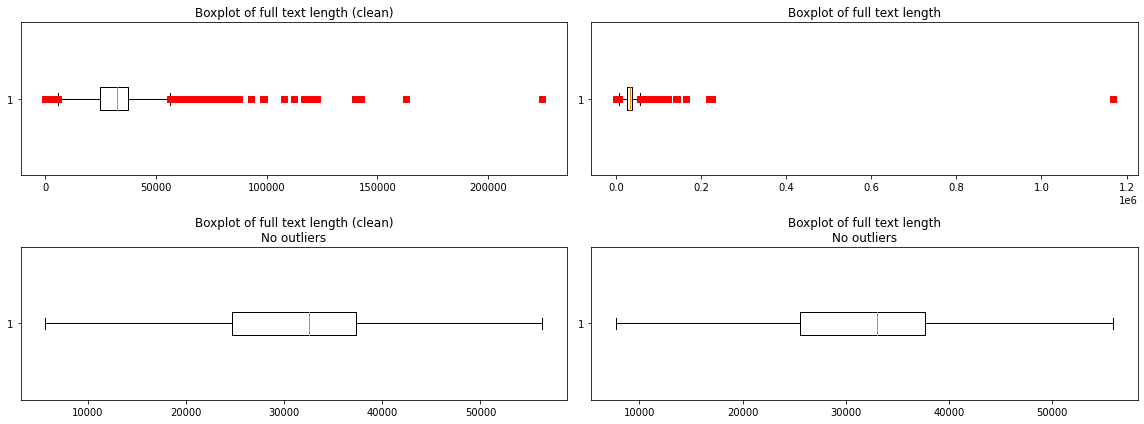

In [34]:
def clean_whitespace(text: str) -> str:
    """
    Removes the whitespace on the text
    """
    txt_no_spaces = re.sub(r"[ \t\f\r]+", " ", text)
    return re.sub(r"\n+", "\n", txt_no_spaces)

full_text_clean = no_na_papers.full_text.apply(clean_whitespace)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,6))

ax1.boxplot(full_text_clean.apply(lambda text: len(text)).values, 0, 'rs', 0)
ax1.set_title("Boxplot of full text length (clean)")

ax2.boxplot(paper_length.values, 0, 'rs', 0)
ax2.set_title("Boxplot of full text length")
      
ax3.boxplot(full_text_clean.apply(lambda text: len(text)).values, 0, '', 0)
ax3.set_title("Boxplot of full text length (clean)\nNo outliers")

ax4.boxplot(paper_length.values, 0, '', 0)
ax4.set_title("Boxplot of full text length\nNo outliers")

plt.tight_layout()
plt.show()

The distribution hasn't really shifted but at least the worst outliers were readjusted.

## Detecting gibberish

So far we managed to clean the spaces and detect compact text. Now what about badly parsed text? Despite every article being read and understood with Python's `print()` function, there can be instances of badly parsed text, like the 10th shortest text including only numbers and punctuation.

One strategy would be to take any non-whitespace character, then evaluate the proportion between numbers and punctuation, all over the clean text.

[]

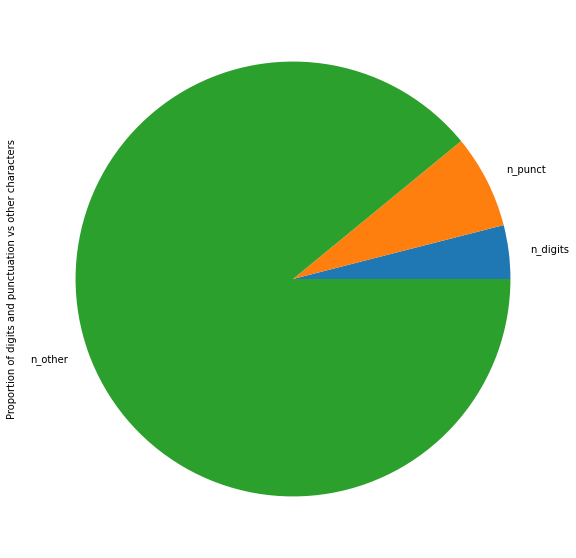

In [35]:
from typing import Tuple
import string

data = {
    "total": [],
    "n_digits": [],
    "n_punct": []
}

def char_proportion(text: str) -> Tuple[int, int, int]:
    """
    Returns a tuple with the following
    - Number of non-space characters
    - Number of digits
    - Number of punctuation characters
    """
    count_chrs = 0
    count_digit = 0
    count_punct = 0
    
    # Pattern for punctuation with Python's string module
    punct_patt = re.compile(fr"[{string.punctuation}]+", re.M)
    
    for match in re.finditer(r'\S+', text, re.MULTILINE):
        count_chrs += (match.end() - match.start())
        non_space_txt = match.group()
        for dig_match in re.finditer(r'\d+', non_space_txt, re.MULTILINE):
            count_digit += (dig_match.end() - dig_match.start())
        
        for punct_match in punct_patt.finditer(non_space_txt):
            count_punct += (punct_match.end() - punct_match.start())
        
        
    return (count_chrs, count_digit, count_punct)


for _, row in full_text_clean.apply(char_proportion).iteritems():
    tot, n_dig, n_pun = row
    data["total"].append(tot)
    data["n_digits"].append(n_dig)
    data["n_punct"].append(n_pun)

chr_prop = pd.DataFrame(data)
chr_prop['n_other'] = chr_prop.total - (chr_prop.n_digits + chr_prop.n_punct)


fig, ax = plt.subplots(figsize=(10, 10))
chr_prop[['n_digits', 'n_punct', 'n_other']].sum().plot.pie(ax=ax)
ax.set_ylabel("Proportion of digits and punctuation vs other characters")
plt.plot()

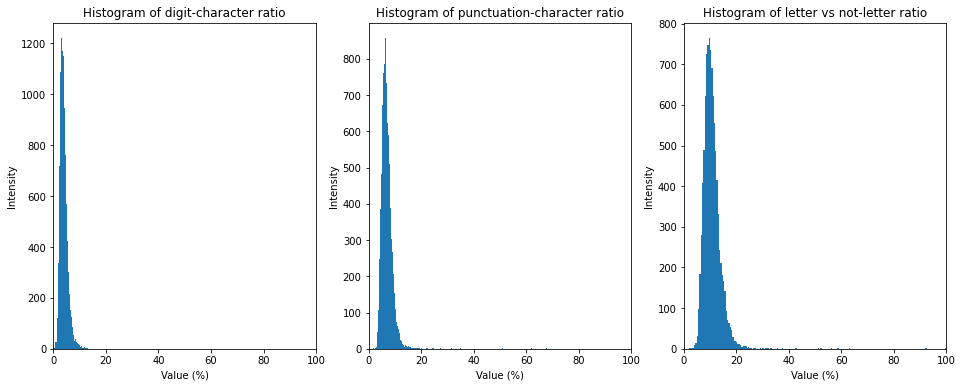

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

ax1.hist((chr_prop.n_digits / chr_prop.total).mul(100).values, bins=200)
ax1.set_title("Histogram of digit-character ratio")
ax1.set_xlabel("Value (%)")
ax1.set_ylabel("Intensity")
ax1.set_xlim(0, 100)

ax2.hist((chr_prop.n_punct / chr_prop.total).mul(100).values, bins=200)
ax2.set_title("Histogram of punctuation-character ratio")
ax2.set_xlabel("Value (%)")
ax2.set_ylabel("Intensity")
ax2.set_xlim(0, 100)

ax3.hist(((chr_prop.n_punct + chr_prop.n_digits) / chr_prop.total).mul(100).values, bins=200)
ax3.set_title("Histogram of letter vs not-letter ratio")
ax3.set_xlabel("Value (%)")
ax3.set_ylabel("Intensity")
ax3.set_xlim(0, 100)

plt.show()

Looks like the proportion is relatively reasonable (the distribution is centered on 8-10% for each). Which means most of the dataset is relatively clean. Counting the portion where digits and punctuations combined exceed 25% will only display 26 entries. Let's see hwo they look like.

In [37]:
chr_no_chr_prop = ((chr_prop.n_punct + chr_prop.n_digits) / chr_prop.total)
for _, txt in full_text_clean.iloc[chr_no_chr_prop[chr_no_chr_prop > 0.25].index].head(5).iteritems():
    print(txt[:20], '\n...\n', txt[-20:], '\n')

626 
ANALYZING THE E 
...
 
~ 
a-
0) 
to c.o 
  

Continuous Speech Re 
...
 sing, April 1990. 
  


 

  
 
...
 
¹

4
ß
9
A
Ó
2
j
  




!
   
...
 
6


`
p
Ü
°
³
f
  


 
 
)* 
...
 
ð
ð
j
Ó





  



As we can see, some of this text is unintelligible. Using everything we applied so far, we can set up our full dtataset of cleaned full text with

* Removing the shortest entries (total length under 1000 characters)
* Removing the compact text (no space at all)
* Removing the unintelligible entries (non-letter/letter ratio over 25%)

In [38]:
# Next delete the compact text and the first entries (<1500 characters)
shortest_papers_idx = paper_length[paper_length < 1500].index
compact_text_idx = paper_ws[paper_ws.clusters == 1].index
gibberish_idx = chr_no_chr_prop[chr_no_chr_prop > 0.25].index

idx_to_drop = list(set(shortest_papers_idx.to_list() + compact_text_idx.to_list() + gibberish_idx.to_list()))
idx_to_drop = pd.Index(idx_to_drop)

full_text_final = full_text_clean.drop(idx_to_drop, axis=0)
print(f"{idx_to_drop.size} of {full_text_clean.shape[0]} entries removed")

96 of 9680 entries removed


It looks like we only filtered a small amount of papers, which is good for an eventual study.

# spaCy visualization

Last but not least, let's try to visualize how well the spaCy library fares over one of those texts. 

In [39]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(full_text_final.sample(n=1).item())
displacy.render(doc[:1500] , style="ent", jupyter=True)

So far, spaCy's English module manages to find persons and orgs, but loses itself in-between equation residuals and number references. So far, rearranging equations from raw text is easier said than done, mostly because we don't know how they were originally written, and because we don't have the $\TeX$ source code, which could've helped us generate a SVG and put aside as a figure.